In [ ]:
#assignment 4 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SECTION A

In [ ]:
#SECTION-A
df=pd.read_csv("/Users/ayushparoha/Documents/Data_Science/env/college/ass4/PS_20174392719_1491204439457_log.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
print(df.shape)

(6362620, 11)


In [ ]:
Numerical_features=df.select_dtypes(include=np.number).columns
print(Numerical_features)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [ ]:
#value_counts is a function used to detect the unique values in a colum at[0] then genunine transaction  
frauds=df["isFraud"].value_counts()
print("Genunine Transaction: ", frauds[0])
print("Fraud Transaction", frauds[1])

Genunine Transaction:  6354407
Fraud Transaction 8213


In [ ]:
percentage=(frauds[1]/len(df))*100
print("Fraud transaction Percentage--> ", percentage)

Fraud transaction Percentage-->  0.12908204481801522


SECTON B

In [ ]:
#SECTION B
cm=df[Numerical_features].corr()
print(df[cm])

         step type  amount nameOrig  oldbalanceOrg  newbalanceOrig nameDest  \
0         NaN  NaN     NaN      NaN            NaN             NaN      NaN   
1         NaN  NaN     NaN      NaN            NaN             NaN      NaN   
2         NaN  NaN     NaN      NaN            NaN             NaN      NaN   
3         NaN  NaN     NaN      NaN            NaN             NaN      NaN   
4         NaN  NaN     NaN      NaN            NaN             NaN      NaN   
...       ...  ...     ...      ...            ...             ...      ...   
6362615   NaN  NaN     NaN      NaN            NaN             NaN      NaN   
6362616   NaN  NaN     NaN      NaN            NaN             NaN      NaN   
6362617   NaN  NaN     NaN      NaN            NaN             NaN      NaN   
6362618   NaN  NaN     NaN      NaN            NaN             NaN      NaN   
6362619   NaN  NaN     NaN      NaN            NaN             NaN      NaN   

         oldbalanceDest  newbalanceDest  isFraud  i

In [ ]:
fraud_corr=cm["isFraud"].abs().sort_values(ascending=False)
print("correlation values of all numerical features with isFraud",fraud_corr)

correlation values of all numerical features with isFraud isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceOrig    0.008148
oldbalanceDest    0.005885
newbalanceDest    0.000535
Name: isFraud, dtype: float64


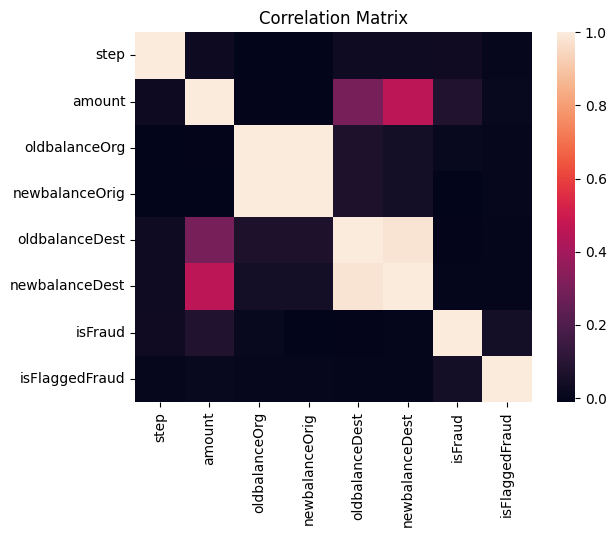

In [ ]:
sns.heatmap(cm)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
tcf=fraud_corr.head(4).index.tolist()
if 'isFraud' in tcf:
    tcf.remove('isFraud')

In [ ]:
print("Top 3 Features correlated with Fraud",tcf)

Top 3 Features correlated with Fraud ['amount', 'isFlaggedFraud', 'step']


SECTON C

In [ ]:
#SECTION C
q1=df["amount"].quantile(0.25)
q3=df["amount"].quantile(0.75)
print(f"q1: {q1}, q3: {q3}")

q1: 13389.57, q3: 208721.4775


In [ ]:
IQR=q3-q1
print(f"IQR: {IQR}")
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

IQR: 195331.9075
Lower Bound: -279608.29125
Upper Bound: 501719.33875


In [ ]:
total_outliers=df[(df['amount']>lower_bound) | (df['amount']<upper_bound)]
print("Total outliers in Amount: ", len(total_outliers))

Total outliers in Amount:  6362620


In [ ]:
fraudulent_outliers=total_outliers[total_outliers['isFraud']==1]
print("Fradulent Outliers: ",len(fraudulent_outliers))

Fradulent Outliers:  8213


Text(0.5, 1.0, 'IQR Outlier Detection (Box Plot)')

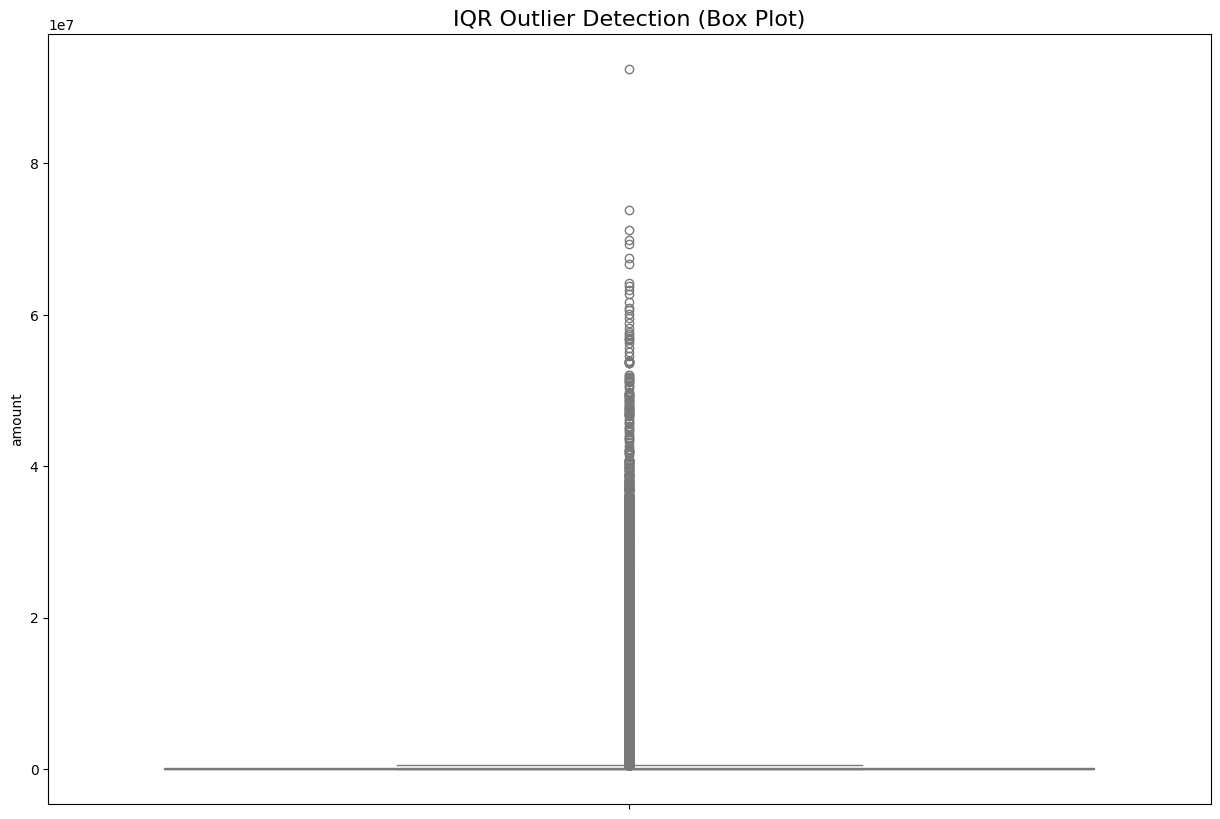

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=df['amount'], color="lightblue")
plt.title("IQR Outlier Detection (Box Plot)", fontsize=16)

SECTON D

In [ ]:
#SECTION D
print("\n--- Z score Outlier Detection for Top 5 features ---")
z_score_threshold = 3
top_5_features = fraud_corr.drop('isFraud').head(5).index
print(top_5_features)


--- Z score Outlier Detection for Top 5 features ---
Index(['amount', 'isFlaggedFraud', 'step', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')


Feature: amount
Mean:  179861.90
Standard Deviation: 603858.23
 Z-score Threshold: 3
Total Outliers (Z-score): 44945
Fraudlent Outliers (Class=1) among Z-score outliers: 1686
Feature: isFlaggedFraud
Mean:  0.00
Standard Deviation: 0.00
 Z-score Threshold: 3
Total Outliers (Z-score): 16
Fraudlent Outliers (Class=1) among Z-score outliers: 16
Feature: step
Mean:  243.40
Standard Deviation: 142.33
 Z-score Threshold: 3
Total Outliers (Z-score): 66620
Fraudlent Outliers (Class=1) among Z-score outliers: 826
Feature: oldbalanceOrg
Mean:  833883.10
Standard Deviation: 2888242.67
 Z-score Threshold: 3
Total Outliers (Z-score): 155140
Fraudlent Outliers (Class=1) among Z-score outliers: 312
Feature: newbalanceOrig
Mean:  855113.67
Standard Deviation: 2924048.50
 Z-score Threshold: 3
Total Outliers (Z-score): 155931
Fraudlent Outliers (Class=1) among Z-score outliers: 57


/Users/ayushparoha/Library/Python/3.14/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


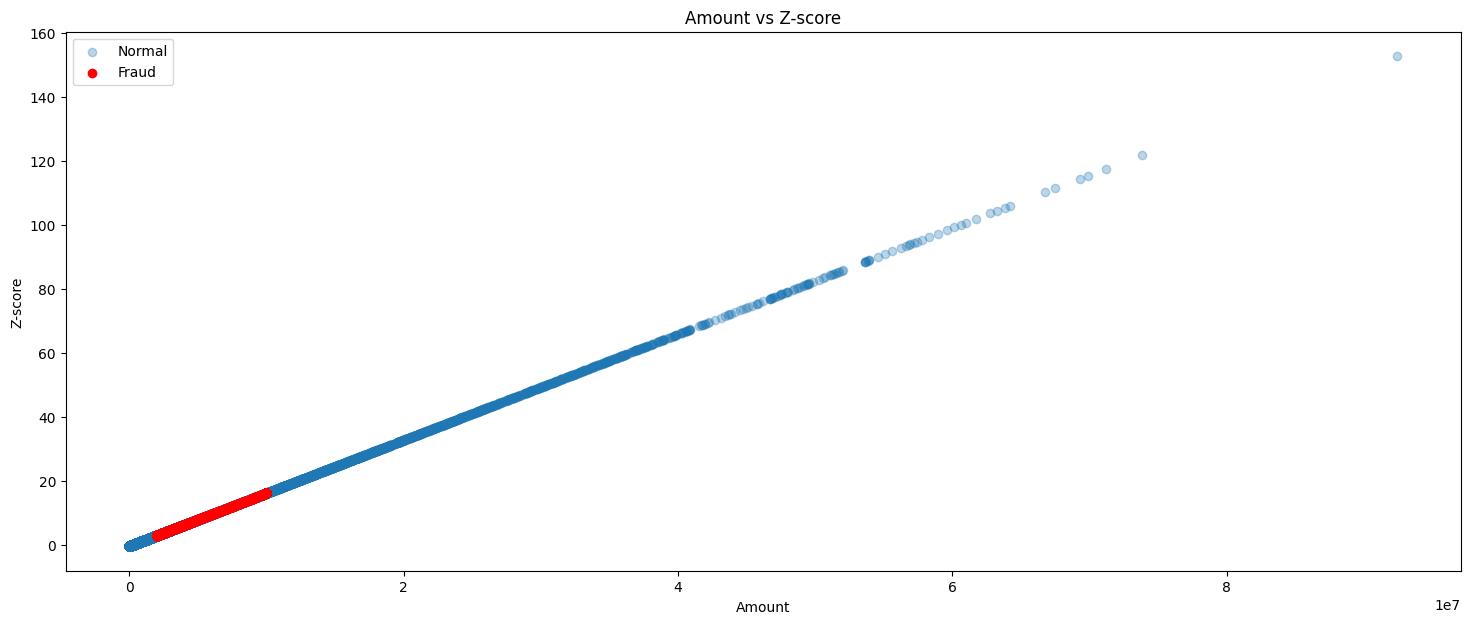

In [ ]:
for feature in top_5_features:
  mean_value = df[feature].mean()
  std_value = df[feature].std()

  df[f'{feature}_zscore'] = (df[feature] - mean_value) / std_value

  total_outliers_zscore = df[df[f'{feature}_zscore'].abs() > z_score_threshold]


  fradlent_outliers_zscore = total_outliers_zscore[total_outliers_zscore['isFraud'] == 1]

  print(f"Feature: {feature}")
  print(f"Mean: {mean_value: .2f}")
  print(f"Standard Deviation: {std_value:.2f}")
  print(f" Z-score Threshold: {z_score_threshold}")
  print(f"Total Outliers (Z-score): {len(total_outliers_zscore)}")
  print(f"Fraudlent Outliers (Class=1) among Z-score outliers: {len(fradlent_outliers_zscore)}")

plt.figure(figsize=(18,7))


if 'amount_zscore' not in df.columns:
    mean_amount = df['amount'].mean()
    std_amount = df['amount'].std()
    df['amount_zscore'] = (df['amount'] - mean_amount) / std_amount


z_score_threshold = 3
total_outliers_amount_zscore = df[df['amount_zscore'].abs() > z_score_threshold]
z_fraud = total_outliers_amount_zscore[total_outliers_amount_zscore['isFraud'] == 1]

plt.scatter(df['amount'], df['amount_zscore'], alpha=0.3, label="Normal")
plt.scatter(z_fraud['amount'], z_fraud['amount_zscore'], color='red', label="Fraud")

plt.xlabel("Amount")
plt.ylabel("Z-score")
plt.title("Amount vs Z-score")
plt.legend()
plt.show()